In [1]:
'''
Source: http://nbviewer.jupyter.org/github/natematias/research_in_python/blob/master/multilevel_models/Multilevel%20Models.ipynb
'''
%matplotlib inline
import pandas as pd               # Pandas handles dataframes
import numpy as np                # Numpy handles lots of basic maths operations
import matplotlib.pyplot as plt   # Matplotlib for plotting
import seaborn as sns             # Seaborn for beautiful plots
from dateutil import *            # I prefer dateutil for parsing dates
import math                       # transformations
import statsmodels.formula.api as smf  # for doing statistical regression
import statsmodels.api as sm      # access to the wider statsmodels library, including R datasets
from collections import Counter   # Counter is useful for grouping and counting
import scipy

path = r"C:\Users\nkieu\Desktop\Python\Stats modeling"
hsb_df = pd.read_stata(path + "\\hsb.dta","w" )

In [3]:
print(hsb_df.shape)
hsb_df.head().T

(7185, 26)


,0,1,2,3,4
minority,0.000000,0.000000,0.000000,0.000000,0.000000
female,1.000000,1.000000,0.000000,0.000000,0.000000
ses,-1.528000,-0.588000,-0.528000,-0.668000,-0.158000
mathach,5.876000,19.708000,20.349001,8.781000,17.898001
size,842.000000,842.000000,842.000000,842.000000,842.000000
sector,0.000000,0.000000,0.000000,0.000000,0.000000
pracad,0.350000,0.350000,0.350000,0.350000,0.350000
disclim,1.597000,1.597000,1.597000,1.597000,1.597000
himinty,0.000000,0.000000,0.000000,0.000000,0.000000
schoolid,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000


In [4]:
np.sum(hsb_df.isna())

minority    0
female      0
ses         0
mathach     0
size        0
sector      0
pracad      0
disclim     0
himinty     0
schoolid    0
mean        0
sd          0
sdalt       0
junk        0
sdalt2      0
num         0
se          0
sealt       0
sealt2      0
t2          0
t2alt       0
pickone     0
mmses       0
mnses       0
xb          0
resid       0
dtype: int64

The goal of this dataset is to infer the relationship between the school's variable.

In [11]:
print("Number of schools is", len(hsb_df.schoolid.unique()))

Number of schools is 160


In [12]:
# Mathematical achievement vs Socioeconomic Status
hsb_df[['mathach','ses']].describe()

,mathach,ses
count,7185.000000,7185.000000
mean,12.747853,0.000143
std,6.878242,0.779352
min,-2.832000,-3.758000
25%,7.275000,-0.538000
50%,13.131000,0.002000
75%,18.316999,0.602000
max,24.993000,2.692000


In [14]:
school_gp = hsb_df.groupby("schoolid").aggregate(np.mean)
school_gp.head().T

schoolid,1224.0,1288.0,1296.0,1308.0,1317.0
minority,0.085106,0.120000,0.979167,0.400000,0.729167
female,0.595745,0.440000,0.645833,0.000000,1.000000
ses,-0.434383,0.121600,-0.425500,0.528000,0.345333
mathach,9.715446,13.510800,7.635958,16.255501,13.177688
size,842.000000,1855.000000,1719.000000,716.000000,455.000000
sector,0.000000,0.000000,0.000000,1.000000,1.000000
pracad,0.350000,0.270000,0.320000,0.960000,0.950000
disclim,1.597000,0.174000,-0.137000,-0.622000,-1.694000
himinty,0.000000,0.000000,1.000000,0.000000,1.000000
mean,9.715446,13.510800,7.635958,16.255501,13.177688


In [15]:
# Demean the Math Achievement
sgp = school_gp.to_dict()
def school_mathach(f):
    return float(f.mathach) - sgp['mathach'][f.schoolid]

hsb_df['school_mathach'] = hsb_df.apply(school_mathach, 1)

                            OLS Regression Results                            
Dep. Variable:                mathach   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     1075.
Date:                Mon, 21 May 2018   Prob (F-statistic):          8.71e-220
Time:                        16:45:08   Log-Likelihood:                -23549.
No. Observations:                7185   AIC:                         4.710e+04
Df Residuals:                    7183   BIC:                         4.712e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.7474      0.076    168.424      0.0

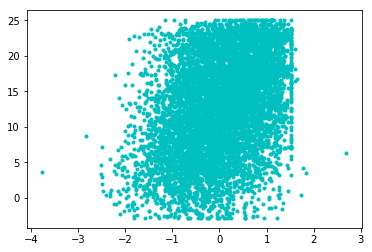

In [21]:
### Using StatsModels for ols
### The display is similar to R
result = smf.ols(formula = "mathach ~ ses", data = hsb_df).fit()
print(result.summary())
plt.scatter(hsb_df.ses, hsb_df.mathach, marker=".", color="c")

Notice that the R-square is only 0.13, but the coefficient is statistically significant.

                            OLS Regression Results                            
Dep. Variable:                mathach   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     253.1
Date:                Mon, 21 May 2018   Prob (F-statistic):           1.25e-34
Time:                        16:46:28   Log-Likelihood:                -331.96
No. Observations:                 160   AIC:                             667.9
Df Residuals:                     158   BIC:                             674.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.6573      0.153     82.568      0.0

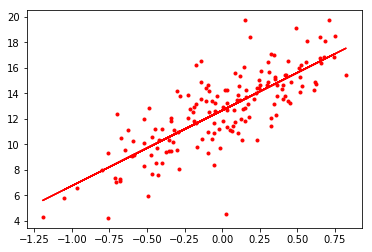

In [22]:
### If we fit per school
result_school = smf.ols(formula = "mathach ~ ses", data = school_gp).fit()
print(result_school.summary())
plt.scatter(school_gp.ses, school_gp.mathach, marker=".", color="r")
plt.plot(school_gp.ses, result_school.predict(), "-", color="r")

We have a nice fit with 61% R2. Our simple graph also show that the effect sếm to be relatively linear. 
# Fix effects model
We consider each school has a separate intercept. 

In [24]:
def demeaned_ses(f):
    return f.ses - school_gp.to_dict()['ses'][f['schoolid']]
# add the school mean SES to the dataframe for each student
def schoolmean_ses(f):
    return school_gp.to_dict()['ses'][f['schoolid']]

hsb_df['demeaned_ses'] = hsb_df.apply(demeaned_ses, axis=1)
hsb_df['schoolmean_ses'] = hsb_df.apply(schoolmean_ses, axis=1)

In [28]:
hsb_df['schoolid_str'] = hsb_df['schoolid'].map(str)

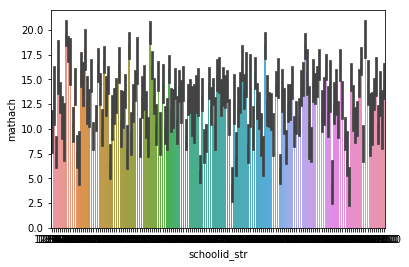

In [29]:
 sns.barplot(x="schoolid_str", y="mathach", data=hsb_df)

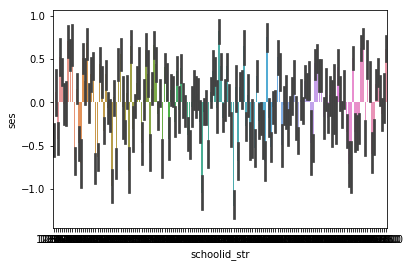

In [30]:
 sns.barplot(x="schoolid_str", y="ses", data=hsb_df)

In [37]:
result_school_covary = smf.ols(formula = "mathach ~ ses + schoolmean_ses", 
                 data = hsb_df).fit()
print(result_school_covary.summary())

                            OLS Regression Results                            
Dep. Variable:                mathach   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     696.4
Date:                Mon, 21 May 2018   Prob (F-statistic):          3.75e-277
Time:                        17:12:18   Log-Likelihood:                -23413.
No. Observations:                7185   AIC:                         4.683e+04
Df Residuals:                    7182   BIC:                         4.685e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         12.7470      0.074    171.

We still have very low R^2, but we can see that both the coefficients for both variables are positive. I suspect that the result would be the same if we have dummy variables for school id. Let's check

In [38]:
hsb_df_dummies = pd.get_dummies(hsb_df, prefix=['schoolid_str'])
# hsb_df_dummies.head().T

In [65]:
dummiesCols = hsb_df_dummies.columns.str.contains("schoolid_str_")
dummiesCols = hsb_df_dummies.columns.values[dummiesCols]

In [70]:
hsb_df_redux = hsb_df_dummies.loc[:,list(dummiesCols) + ['ses','mathach']]

In [87]:
hsb_df_redux.columns = hsb_df_redux.columns.map(lambda x: x.replace(".0",""))

In [89]:
all_columns = "+".join(list(hsb_df_redux.columns)[:-1])
result_redux = smf.ols(formula = "mathach ~ " + all_columns, data = hsb_df_redux).fit()
print(result_redux.summary())

                            OLS Regression Results                            
Dep. Variable:                mathach   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     13.49
Date:                Mon, 21 May 2018   Prob (F-statistic):          1.27e-295
Time:                        17:39:23   Log-Likelihood:                -23087.
No. Observations:                7185   AIC:                         4.650e+04
Df Residuals:                    7024   BIC:                         4.760e+04
Df Model:                         160                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -1.651e+12   1.42e+1

Now we have higher R^2, but most of our variables are statistically insignificant. This is a very good exercise.

Let's examine the Random Effect models. It appears that my result does not converge like in the original workbook, despite having very similar Negative Log likelihood value.

In [92]:
##http://statsmodels.sourceforge.net/devel/mixed_linear.html
md = smf.mixedlm("mathach ~ ses", data=hsb_df, groups=hsb_df["schoolid"])
result = md.fit()
print(result.summary())

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: mathach    
No. Observations: 7185    Method:             REML       
No. Groups:       160     Scale:              37.0491    
Min. group size:  14      Likelihood:         -23322.5963
Max. group size:  67      Converged:          No         
Mean group size:  44.9                                   
----------------------------------------------------------
           Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
----------------------------------------------------------
Intercept  12.658     0.186  67.919  0.000  12.293  13.023
ses         2.394     0.108  22.174  0.000   2.182   2.605
Group Var   4.670     0.105                               



C:\Anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Anaconda\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2026: ConvergenceWarning: Gradient optimization failed.
  warnings.warn(msg, ConvergenceWarning)
